# Training project
### This project about : Effect of COVID-19 on global trade

In [1]:
#import laibriries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import sqlite3
import seaborn as ses

## First step: <font color="green">Read Data</font> . 


### Here, is an example of csv_ file loading
#### Use this code: 
##### <font color="red">data_name= pd.read_csv("file_name.csv")</font> , we are using df for data name as example, may be others as you like

In [2]:
#Read csv file
df=pd.read_csv("effects-of-covid19-on-trade-at-27-october-2021-provisional.csv")

## Second step : <font color="green">Exploratory analysis</font>

#### <font color="blue">1- Display general shape of data</font>

#### A-  <font color='red'>df.head()</font> function :
##### To display the first 5 rows of datafram: defult =5 if you need more rows write the no. such as : df.head(number of rows)

In [3]:
df.head()

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,01/01/2015,Thursday,All,All,All,$,104000000,104000000
1,Exports,2015,02/01/2015,Friday,All,All,All,$,96000000,200000000
2,Exports,2015,03/01/2015,Saturday,All,All,All,$,61000000,262000000
3,Exports,2015,04/01/2015,Sunday,All,All,All,$,74000000,336000000
4,Exports,2015,05/01/2015,Monday,All,All,All,$,105000000,442000000


##### C-  <font color="red"> df.shape</font> function:
##### To display the number of dimensions as well as the size in each dimension. Since data frames are two-dimensional, what shape returns is the number of rows (first no.) and columns (second no.)

In [4]:
# shape of data
df.shape

(109268, 10)

##### G- <font color="red">info()</font> function:
###### to display: 
1- Rang index (no of rows)
2- no. of columns
3- column names
4- no. of non null values in each column
5- data type(dtype) of data
6- no. of each dtype
 7- memeory usage during this process.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109268 entries, 0 to 109267
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Direction       109268 non-null  object
 1   Year            109268 non-null  int64 
 2   Date            109268 non-null  object
 3   Weekday         109268 non-null  object
 4   Country         109268 non-null  object
 5   Commodity       109268 non-null  object
 6   Transport_Mode  109268 non-null  object
 7   Measure         109268 non-null  object
 8   Value           109268 non-null  int64 
 9   Cumulative      109268 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 5.4+ MB


#### <font color="blue">2- Display basic static of data</font>

##### 1- <font color="red">df.describe() </font> function:
   ######    To display group of basic static at once such as : count, mean, std, min, max,... 
   ###### To get the basic statistical characteristics of each numerical column. <font color='red'>Only numerical columns</font> like integer and float can be statistically analyzed by default 

In [6]:
df.describe()

,Year,Value,Cumulative
count,109268.000000,1.092680e+05,1.092680e+05
mean,2017.922502,2.884277e+07,5.061825e+09
std,1.965674,5.220912e+07,9.547532e+09
min,2015.000000,0.000000e+00,0.000000e+00
25%,2016.000000,1.000000e+06,1.120000e+08
50%,2018.000000,8.000000e+06,1.393000e+09
75%,2020.000000,2.700000e+07,4.682000e+09
max,2021.000000,5.490000e+08,6.436600e+10


##### ** If you want to show  basic static for <font color='blue'>certain column</font>, you can use these available codes.
##### 1- <font color='red'>df["Column_name"].describe()</font>   2- <font color='red'>df.Column_name.describe()</font>

In [7]:

# dataframe_name["column_name"].describe()
df["Value"].describe()

count    1.092680e+05
mean     2.884277e+07
std      5.220912e+07
min      0.000000e+00
25%      1.000000e+06
50%      8.000000e+06
75%      2.700000e+07
max      5.490000e+08
Name: Value, dtype: float64

###### If we want to analyze the <font color='blue'>non-numeric columns</font> then we have to specify manually shown below. Mean, Median, Standard Deviation, range, percentiles can be easily calculated using the described method.

In [8]:
df["Country"].describe()

count     109268
unique         9
top          All
freq       49814
Name: Country, dtype: object

In [9]:
df["Commodity"].describe()

count     109268
unique         9
top          All
freq       44831
Name: Commodity, dtype: object

In [10]:
df_corr=df.corr()
df_corr

,Year,Value,Cumulative
Year,1.000000,0.046663,0.024753
Value,0.046663,1.000000,0.714260
Cumulative,0.024753,0.714260,1.000000


<AxesSubplot:>

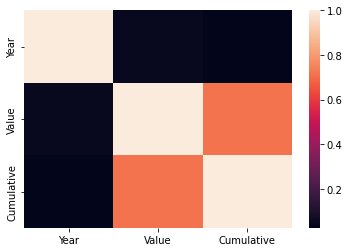

In [11]:
ses.heatmap(df_corr)

## Third step : <font color="green">Cleaning Step</font>

From previous information, we notice that Date column is object and should to convert to datetime64[ns]

In [12]:
df["Date"]=df["Date"].astype("datetime64[ns]")

#### find Null

In [13]:
# find null values
df.isnull().sum()

Direction         0
Year              0
Date              0
Weekday           0
Country           0
Commodity         0
Transport_Mode    0
Measure           0
Value             0
Cumulative        0
dtype: int64

#### find Duplication

In [14]:
df.duplicated().sum()

0

## Start questions

### 1- Number of Countries share in this data and number of commercial traffic for each?

In [15]:
# display all countries
df.Country.value_counts()

All                            49814
China                          27192
East Asia (excluding China)     7470
United States                   7352
Australia                       4983
United Kingdom                  4981
Japan                           2492
European Union (27)             2492
Total (excluding China)         2492
Name: Country, dtype: int64

In [16]:
# Display all countries excluding (All & Total)
df_country_excluding= df[(df.Country!='All') & (df.Country!='Total (excluding China)')]
df_country_excluding.Country.value_counts()

China                          27192
East Asia (excluding China)     7470
United States                   7352
Australia                       4983
United Kingdom                  4981
Japan                           2492
European Union (27)             2492
Name: Country, dtype: int64

##### This data contains the commercial traffic for  7 countries 

### 2- Number of of commerical traffics for these countries?

In [17]:
 # sum of all comm. traffics
df_country_excluding.Direction.count()

56962

In [18]:
# no. of each movement.
directions= df_country_excluding.Direction.value_counts()
directions

Exports    44515
Imports    12447
Name: Direction, dtype: int64

##### There were 56962 traffics divided into 44515 Exports and 12447 Imports

<AxesSubplot:xlabel='Direction', ylabel='number of commercial traffic'>

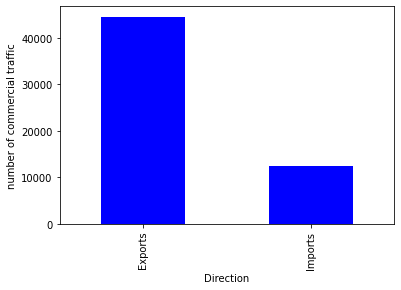

In [19]:
# bar Plot shows te diffrence between Exports and Imports operations during 2015-2021
directions.plot.bar(color='b',xlabel='Direction',ylabel='number of commercial traffic')

### 3- what is the power of each country from this commercial traffic?

In [20]:
# display number of Exports and Imports for each Country during 2015-2021
date_direction=pd.crosstab(df_country_excluding.Country,df_country_excluding.Direction)
date_direction

Direction,Exports,Imports
Country,,
Australia,2492,2491
China,19725,7467
East Asia (excluding China),7470,0
European Union (27),2492,0
Japan,2492,0
United Kingdom,2492,2489
United States,7352,0


<AxesSubplot:xlabel='Country'>

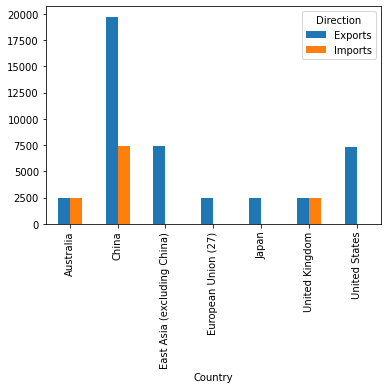

In [21]:
date_direction.plot.bar()

### 4- What are types of commerical traffic field for each country?

In [22]:
country_commodity=pd.crosstab(df_country_excluding.Commodity,df_country_excluding.Country)
country_commodity

Country,Australia,China,East Asia (excluding China),European Union (27),Japan,United Kingdom,United States
Commodity,,,,,,,
All,4983,4983,2492,2492,2492,4981,2492
Electrical machinery and equip,0,2489,0,0,0,0,0
"Fish, crustaceans, and molluscs",0,2469,0,0,0,0,0
"Logs, wood, and wood articles",0,4926,0,0,0,0,0
Meat and edible offal,0,4962,0,0,0,0,4860
Mechanical machinery and equip,0,2487,0,0,0,0,0
"Milk powder, butter, and cheese",0,4876,4978,0,0,0,0


<AxesSubplot:ylabel='Commodity'>

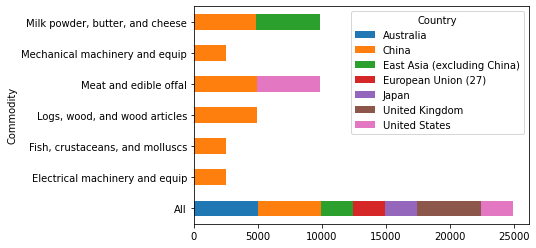

In [23]:
country_commodity.plot.barh(stacked=True)

##### From previous chart, we notice that, China had  the highest commerical traffic in each filed.

### 5- What is amount of comm. traffic per year for each country?

In [24]:
country_date=pd.crosstab([df_country_excluding.Year],df_country_excluding.Country)
country_date

Country,Australia,China,East Asia (excluding China),European Union (27),Japan,United Kingdom,United States
Year,,,,,,,
2015,730,3971,1093,365,365,730,1089
2016,732,3980,1098,366,366,732,1072
2017,730,3985,1095,365,365,729,1063
2018,730,3995,1095,365,365,730,1075
2019,730,3994,1095,365,365,730,1075
2020,732,3976,1096,366,366,732,1080
2021,599,3291,898,300,300,598,898


<AxesSubplot:ylabel='Year'>

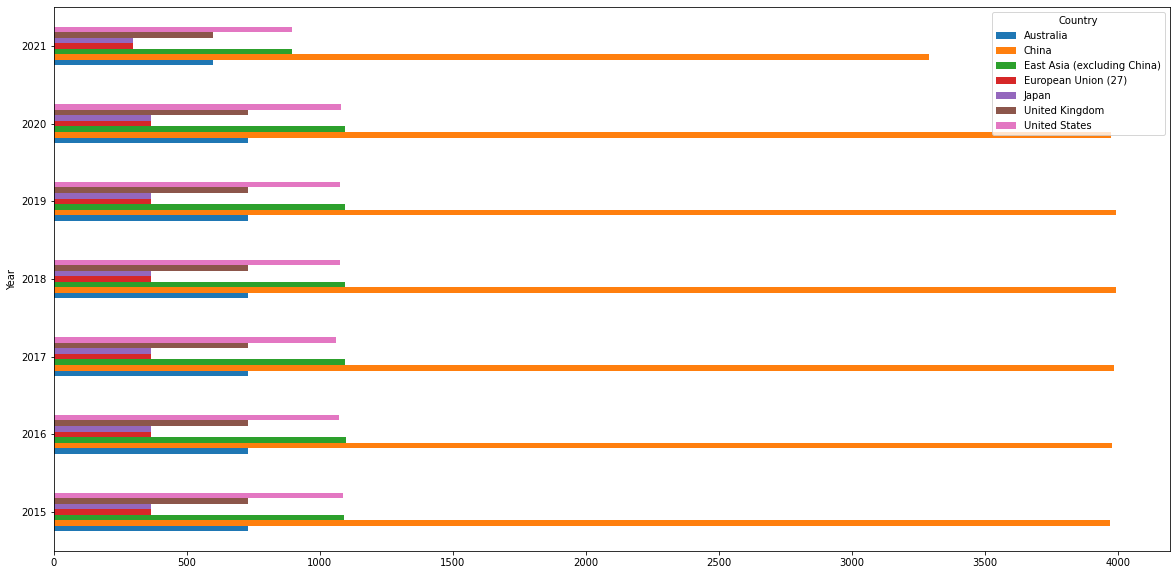

In [25]:
country_date.plot.barh(stacked=False,figsize=(20,10))

##### From this data, we notice that comm. traffic is reduced during 2021 

### 6- What are the values of these traffic for each country?

In [47]:

country_value= pd.crosstab(index=df_country_excluding.Year,columns=df_country_excluding.Country,values=df_country_excluding.Cumulative,aggfunc='sum')
country_value

Country,Australia,China,East Asia (excluding China),European Union (27),Japan,United Kingdom,United States
Year,,,,,,,
2015,2560703000000,4870501115000,2741069209000,664704000000,543565000000,556011000000,1500516470000
2016,2664173000000,5200810527000,2681476133000,708211000000,550783000000,553019000000,1349343979000
2017,2770427000000,6054659206000,2965200478000,681219000000,586827000000,572990000000,1327613497000
2018,2880750000000,6865582956000,3184066107000,794725000000,635500000000,613132000000,1376271605000
2019,2868609000000,8004019527000,3372578715000,748473000000,648406000000,606877000000,1359090521000
2020,2678841000000,7886201062000,3515799110000,748688000000,694025000000,559338000000,1583163365000
2021,1820205000000,6680468100000,2297572686000,501173000000,426212000000,369749000000,1037309646000


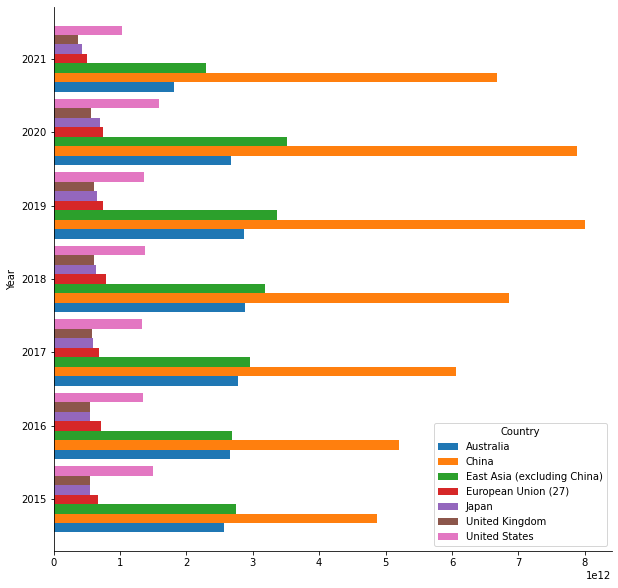

In [48]:
x=country_value.plot(kind='barh',figsize=(10,10),width=0.9)
x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)

<AxesSubplot:title={'center':'Value range of of commecial traffic for each country during 2015-2021'}, ylabel='Value'>

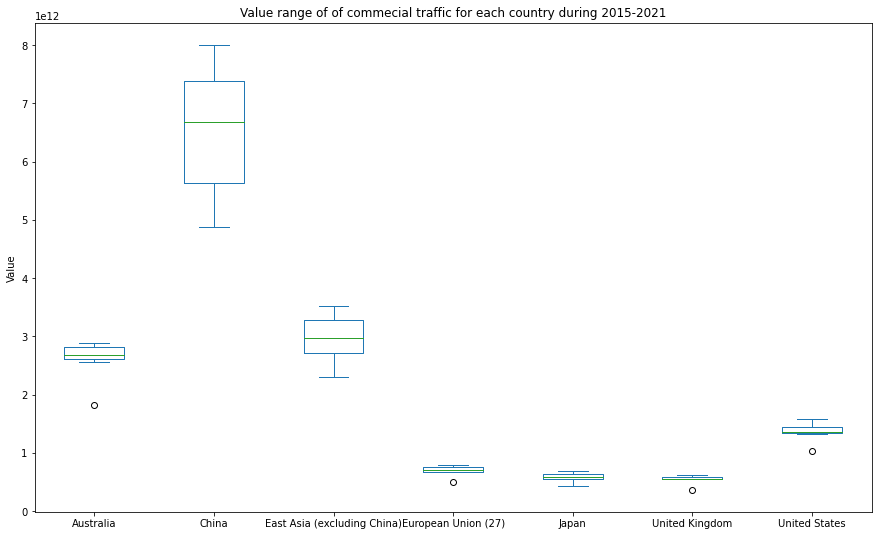

In [49]:
#
country_value.plot(kind='box',xlabel='Country',ylabel='Value',title='Value range of of commecial traffic for each country during 2015-2021',figsize=(15,9))

### 8- What did the highest country have Exports?

In [29]:
country_exports= df_country_excluding.Country[df_country_excluding.Direction=='Exports'].value_counts().sort_values(ascending=False)
country_exports
country_imports= df_country_excluding.Country[df_country_excluding.Direction=='Imports'].value_counts().sort_values(ascending=False)
country_imports

China             7467
Australia         2491
United Kingdom    2489
Name: Country, dtype: int64

(China                          19725
 East Asia (excluding China)     7470
 United States                   7352
 Australia                       2492
 Japan                           2492
 United Kingdom                  2492
 European Union (27)             2492
 Name: Country, dtype: int64,
 <AxesSubplot:title={'center':'Number of Exports for each country during 2015-2021'}, xlabel='Country', ylabel='Number of ُExports'>)

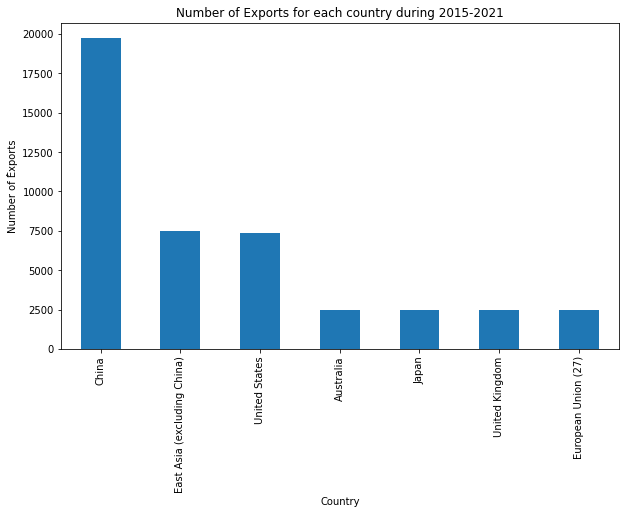

In [40]:
country_exports,country_exports.plot.bar(xlabel='Country', ylabel='Number of ُExports',title='Number of Exports for each country during 2015-2021',figsize=(10,6))

(China             7467
 Australia         2491
 United Kingdom    2489
 Name: Country, dtype: int64,
 <AxesSubplot:title={'center':'Number of Imports for each country during 2015-2021'}, xlabel='Country', ylabel='Number of Imports'>)

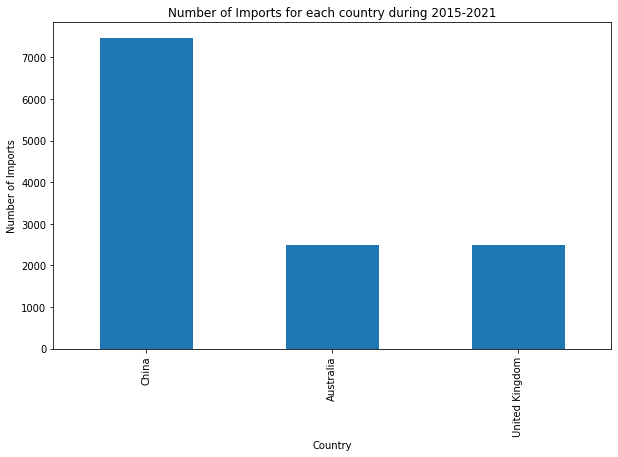

In [41]:
country_imports,country_imports.plot.bar(xlabel='Country', ylabel='Number of Imports',title='Number of Imports for each country during 2015-2021',figsize=(10,6))

#### from previous data, we notice that during the period 2015- 2021, China had the highest  commerical traffic numbers in exports and imports than the others by 19725 and 7467, respectively.

### 9- What is the most important exports and imports of China durring that period?

In [42]:
china_commodity_exports= df_country_excluding.Commodity[(df_country_excluding.Country=='China') & (df_country_excluding.Commodity!='All')&(df_country_excluding.Direction=="Exports")].value_counts()
china_commodity_exports

Meat and edible offal              4962
Logs, wood, and wood articles      4926
Milk powder, butter, and cheese    4876
Fish, crustaceans, and molluscs    2469
Name: Commodity, dtype: int64

<AxesSubplot:>

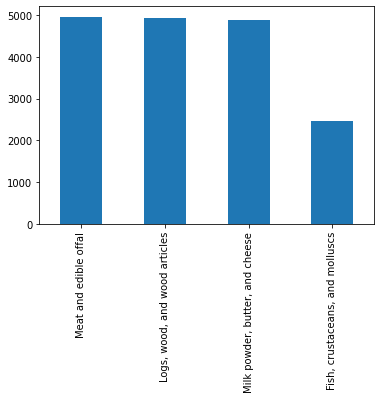

In [43]:
china_commodity_exports.plot.bar()

In [44]:
china_commodity_imports= df_country_excluding.Commodity[(df_country_excluding.Country=='China') & (df_country_excluding.Commodity!='All')&(df_country_excluding.Direction=="Imports")].value_counts()
china_commodity_imports

Electrical machinery and equip    2489
Mechanical machinery and equip    2487
Name: Commodity, dtype: int64

### 10- Compare between number of exports for China and USA

In [45]:
china_usa_year=df_country_excluding[['Country','Year','Direction']][((df_country_excluding.Country=='China')|(df_country_excluding.Country=='United States'))&(df_country_excluding.Direction=='Exports')]
china_usa_yearly=pd.crosstab(index=china_usa_year.Year,columns=china_usa_year.Country)

<AxesSubplot:title={'center':'Number of Exports for China and USA during 2015-2021'}, xlabel='Year', ylabel='Number of Exports'>

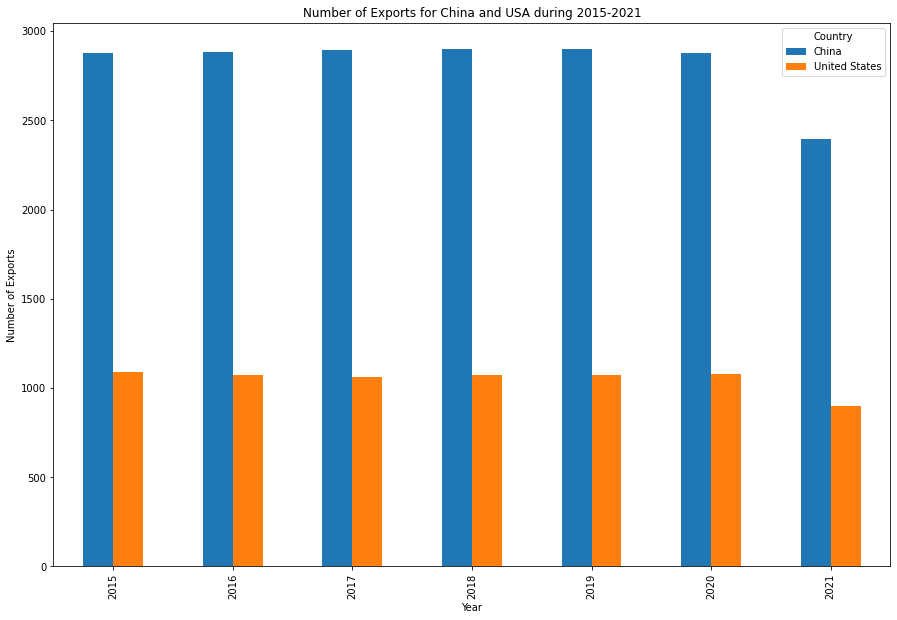

In [46]:
china_usa_yearly.plot(xlabel='Year',ylabel='Number of Exports',title='Number of Exports for China and USA during 2015-2021',kind='bar',figsize=(15,10))

#### From previous bar chart, we notice that China had more number of exports than USA durin period 2015-2021.
## What that mean ???? war of Covid?? or there is an another reason for Covid

# Conclusion:
- This dataset shape is (109268 rows, 10 columns) 
- There was no null value or duplication
- This data contains the commercial traffic for  7 countries (China, East Asia (excluding China), United States, Australia, United Kingdom, Japan,European Union (27))             
- There were 56962 traffics divided into 44515 Exports and 12447 Imports

# The analysis will be continue later, in another section. In addition, we will do this analysis using SQL and EXcel using Tableau and PowerBI for visualization.